In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import datetime as dt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
import datetime as dt
rcParams['figure.figsize']=10,6
import seaborn as sns
from scipy.stats import boxcox

# Gold NYSE historical data from yahoo.finance

In [2]:
# Import Gold data in panda and passed to a variable name "df"
df = pd.read_csv("Gold.csv", parse_dates = True, index_col=0)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-31,17.9375,17.9375,17.6875,17.6875,14.105929,557700
2000-01-03,17.5625,18.1875,17.4375,17.6875,14.105929,1509900
2000-01-04,17.3125,17.6875,17.1250,17.4375,13.906553,1787100
2000-01-05,17.5625,17.8750,17.4375,17.7500,14.155771,1285100
2000-01-06,17.7500,17.8125,17.5000,17.7500,14.155771,1139300


In [100]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-23,12.02,12.24,11.96,11.96,11.919285,13787100
2019-05-24,12.00,12.00,11.75,11.95,11.909319,11025500
2019-05-28,11.70,11.85,11.65,11.74,11.700034,10656200
2019-05-29,11.73,11.97,11.73,11.75,11.710000,11073100
2019-05-30,11.76,11.87,11.66,11.79,11.790000,9272600


In [3]:
dataset = df.loc['2000-01-01' : '2017-12-31']
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-22,14.47,14.54,14.41,14.47,14.206288,5193300
2017-12-26,14.50,14.68,14.48,14.57,14.304465,4846200
2017-12-27,14.60,14.60,14.42,14.49,14.225922,6469000
2017-12-28,14.54,14.58,14.34,14.45,14.186651,6387500
2017-12-29,14.46,14.56,14.40,14.47,14.206288,5619700


# exploratory analysis

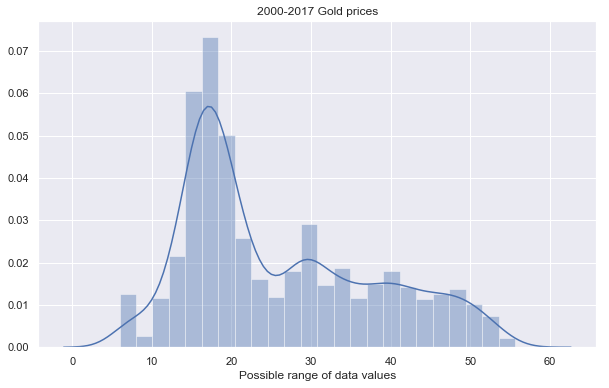

<function matplotlib.pyplot.show(*args, **kw)>

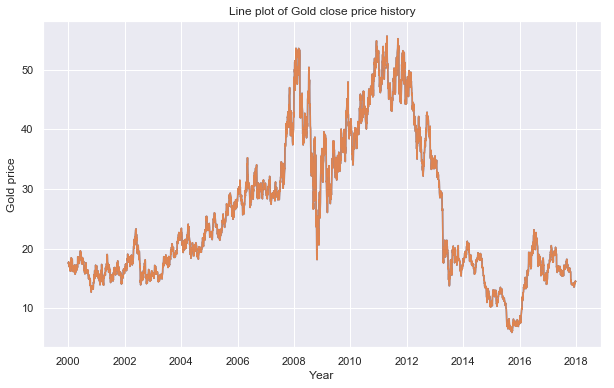

In [30]:
sns.set()
sns.distplot(dataset.Close) #density plot
plt.title("2000-2017 Gold prices")
plt.xlabel('Possible range of data values')
plt.show()

plt.xlabel("Year")
plt.ylabel('Gold price')
plt.title("2000-2017 Gold prices")
plt.plot(dataset.Close)

plt.plot(dataset.Close)
plt.title('Line plot of Gold close price history')
plt.show

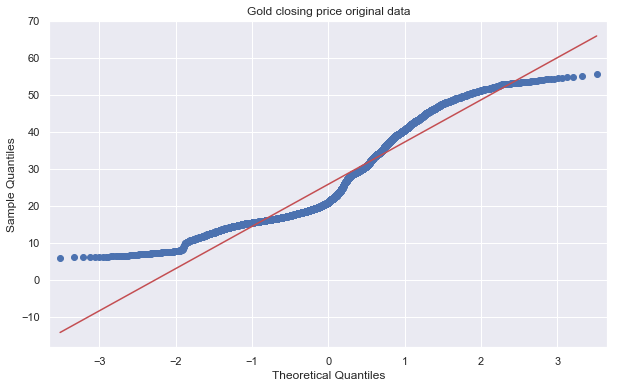

In [31]:
from statsmodels.graphics.gofplots import qqplot
# q-q plot
qqplot(dataset.Close, line='r', ax=plt.gca())
plt.title('Gold closing price original data')
plt.show()

In [32]:
print(dataset.Close.describe())

count    4528.000000
mean       25.851572
std        11.889942
min         5.940000
25%        16.562500
50%        21.040001
75%        34.387501
max        55.630001
Name: Close, dtype: float64


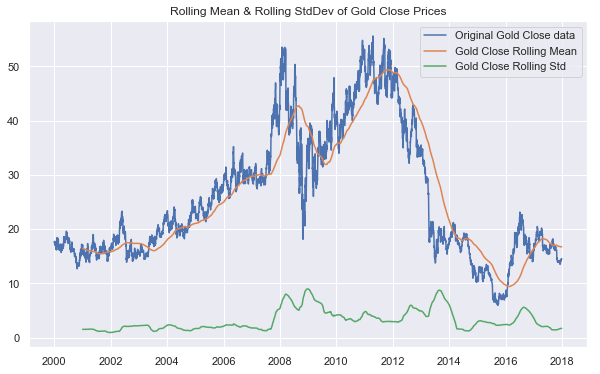

In [47]:
#Rolling statistics
rolmean = dataset.Close.rolling(window=253).mean()
rolSTD = dataset.Close.rolling(window=253).std()

# plot rolling statistic
orig = plt.plot(dataset.Close, label = 'Original Gold Close data')
mean = plt.plot(rolmean,  label = 'Gold Close Rolling Mean')
std = plt.plot(rolSTD, label = 'Gold Close Rolling Std')
plt.title("Rolling Mean & Rolling StdDev of Gold Close Prices")
plt.legend(loc='best')

In [34]:
from statsmodels.tsa.stattools import adfuller

print("Results of Dickey-Fuller Test:")
adftest = adfuller(dataset.Close, autolag = 'AIC')

adfoutput = pd.Series(adftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in adftest[4].items():
    adfoutput['Critical Value (%s)' %key] = value
    print(adfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -1.456028
p-value                           0.555141
#Lags Used                       31.000000
Number of Observations Used    4496.000000
Critical Value (1%)              -3.431805
dtype: float64
Test Statistic                   -1.456028
p-value                           0.555141
#Lags Used                       31.000000
Number of Observations Used    4496.000000
Critical Value (1%)              -3.431805
Critical Value (5%)              -2.862183
dtype: float64
Test Statistic                   -1.456028
p-value                           0.555141
#Lags Used                       31.000000
Number of Observations Used    4496.000000
Critical Value (1%)              -3.431805
Critical Value (5%)              -2.862183
Critical Value (10%)             -2.567112
dtype: float64


In [130]:
from statsmodels.tsa.stattools import kpss
#define KPSS
kpsstest = kpss(dataset.Close, regression='c')
kpssoutput = pd.Series(kpsstest[0:4], index=['Test Statistic','p-value','Lags Used', 'Number of Observations Used'])
for key,value in kpsstest[3].items():
    kpssoutput['Critical Value (%s)'%key] = value
    print (kpssoutput)

Test Statistic                                                           2.61316
p-value                                                                     0.01
Lags Used                                                                     32
Number of Observations Used    {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%...
Critical Value (10%)                                                       0.347
dtype: object
Test Statistic                                                           2.61316
p-value                                                                     0.01
Lags Used                                                                     32
Number of Observations Used    {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%...
Critical Value (10%)                                                       0.347
Critical Value (5%)                                                        0.463
dtype: object
Test Statistic                                                           2.61316


C:\Users\Sarit\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


# data transformation

In [55]:
from scipy.stats import boxcox
# lambda = -1. is a reciprocal transform.
# lambda = -0.5 is a reciprocal square root transform.
# lambda = 0.0 is a log transform.
# lambda = 0.5 is a square root transform.
# lambda = 1.0 is no transform.

dataset.Close, lam = boxcox(dataset.Close)
print('Lambda: %f' % lam)

Lambda: 0.081787


C:\Users\Sarit\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


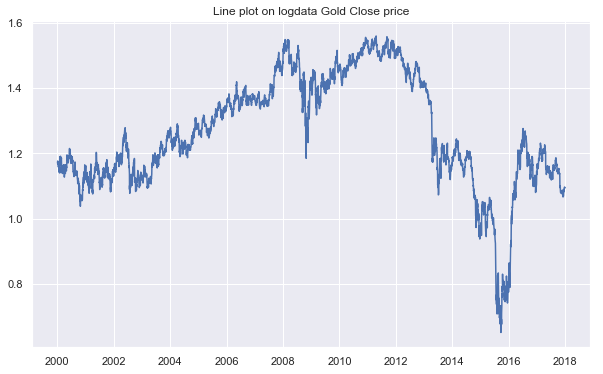

In [131]:
dataset.Close_logscale = np.log(dataset.Close)
X=dataset.Close_logscale
plt.title('Line plot on logdata Gold Close price')
plt.plot(X)

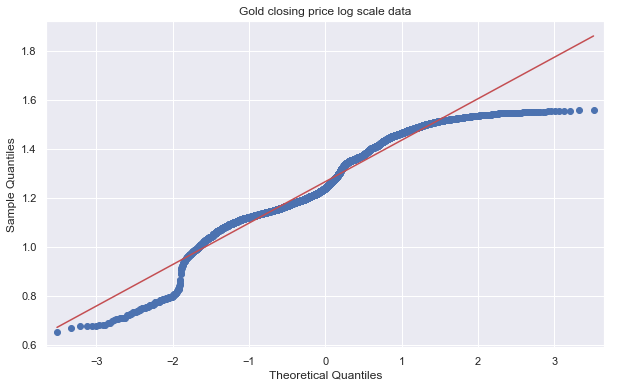

In [57]:
# q-q plot of log data
qqplot(X, line='r', ax=plt.gca())
plt.title('Gold closing price log scale data')
plt.show()

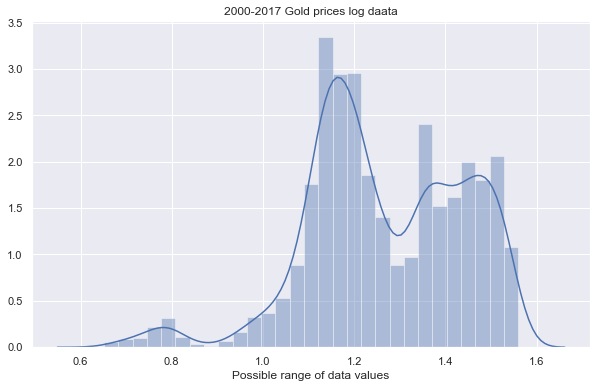

In [98]:
sns.distplot(X) #density plot on log data
plt.title("2000-2017 Gold prices log daata")
plt.xlabel('Possible range of data values')
plt.show()

# Stationarity check

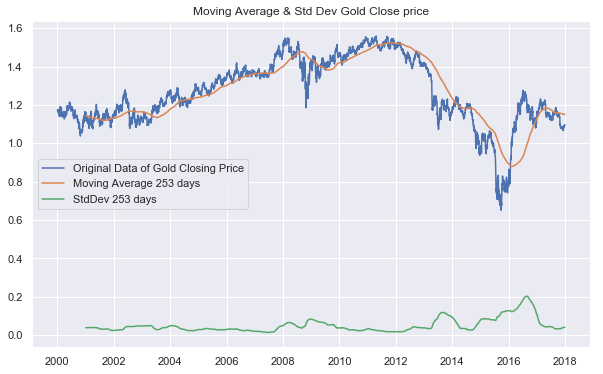

In [112]:
MovingAverage = X.rolling(window=253).mean()
MovingSTD = X.rolling(window=253).std()
plt.plot(X, label = "Original Data of Gold Closing Price")
plt.plot(MovingAverage, label = "Moving Average 253 days")
plt.plot(MovingSTD, label = "StdDev 253 days")
plt.title("Moving Average & Std Dev Gold Close price")
plt.legend(loc='best')

In [60]:
print("Results of Dickey-Fuller Test: logScale data")
adftest = adfuller(X, autolag = 'AIC')

adfoutput = pd.Series(adftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in adftest[4].items():
    adfoutput['Critical Value (%s)' %key] = value
    print(adfoutput)

Results of Dickey-Fuller Test: logScale data
Test Statistic                   -1.877570
p-value                           0.342685
#Lags Used                        9.000000
Number of Observations Used    4518.000000
Critical Value (1%)              -3.431798
dtype: float64
Test Statistic                   -1.877570
p-value                           0.342685
#Lags Used                        9.000000
Number of Observations Used    4518.000000
Critical Value (1%)              -3.431798
Critical Value (5%)              -2.862180
dtype: float64
Test Statistic                   -1.877570
p-value                           0.342685
#Lags Used                        9.000000
Number of Observations Used    4518.000000
Critical Value (1%)              -3.431798
Critical Value (5%)              -2.862180
Critical Value (10%)             -2.567111
dtype: float64


In [127]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
kpsstest = kpss(X, regression='c')
kpssoutput = pd.Series(kpsstest[0:4], index=['Test Statistic','p-value','Lags Used', 'Number of Observations Used'])
for key,value in kpsstest[3].items():
    kpssoutput['Critical Value (%s)'%key] = value
    print (kpssoutput)


Test Statistic                                                           2.52506
p-value                                                                     0.01
Lags Used                                                                     32
Number of Observations Used    {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%...
Critical Value (10%)                                                       0.347
dtype: object
Test Statistic                                                           2.52506
p-value                                                                     0.01
Lags Used                                                                     32
Number of Observations Used    {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%...
Critical Value (10%)                                                       0.347
Critical Value (5%)                                                        0.463
dtype: object
Test Statistic                                                           2.52506


C:\Users\Sarit\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [61]:
# difference between MA and transformed close price
datasetlogScaleMinusMovingAverage = X -MovingAverage
datasetlogScaleMinusMovingAverage.tail(12)

Date
2017-12-13   -0.067512
2017-12-14   -0.065559
2017-12-15   -0.068756
2017-12-18   -0.061109
2017-12-19   -0.063156
2017-12-20   -0.058221
2017-12-21   -0.057942
2017-12-22   -0.056824
2017-12-26   -0.054009
2017-12-27   -0.056293
2017-12-28   -0.057399
2017-12-29   -0.056734
Name: Close, dtype: float64

In [62]:
# remove NaN values
datasetlogScaleMinusMovingAverage.dropna(inplace = True)
datasetlogScaleMinusMovingAverage.head(10)

Date
2001-01-02    0.018713
2001-01-03   -0.002394
2001-01-04   -0.013826
2001-01-05   -0.024048
2001-01-08   -0.019093
2001-01-09   -0.015040
2001-01-10   -0.014628
2001-01-11   -0.021732
2001-01-12   -0.014265
2001-01-16   -0.019832
Name: Close, dtype: float64

In [66]:
def test_stationarity(timeseries):
    
    #determining rolling statistics
    movingAverage = timeseries.rolling(window=253).mean()
    movingSTD = timeseries.rolling(window=253).std()
        
    # plot rolling statistic
    orig = plt.plot(timeseries, label = 'Gold Close Original')
    mean = plt.plot(movingAverage, label = 'Gold Close price MA')
    std = plt.plot(movingSTD, label = 'Rolling Std')
    plt.title("Rolling Mean & Standard Deviation of Gold Close Prices")
    
    #perform Dickey-Fuller test
    print("Results of Dickey-Fuller Test:")
    adftest = adfuller(timeseries, autolag = 'AIC')
    adfoutput = pd.Series(adftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in adftest[4].items():
        adfoutput['Critical Value (%s)' %key] = value
    print(adfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -3.982686
p-value                           0.001504
#Lags Used                        9.000000
Number of Observations Used    4266.000000
Critical Value (1%)              -3.431884
Critical Value (5%)              -2.862218
Critical Value (10%)             -2.567131
dtype: float64


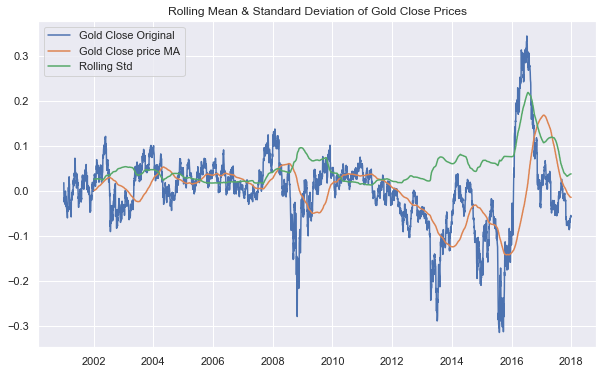

In [67]:
test_stationarity(datasetlogScaleMinusMovingAverage)
plt.legend(loc='best')

In [65]:
print(X.describe())

count    4528.000000
mean        1.266313
std         0.172884
min         0.651318
25%         1.149155
50%         1.241132
75%         1.411628
max         1.559800
Name: Close, dtype: float64


# Exponential moving average

Text(0, 0.5, 'Close Price in $')

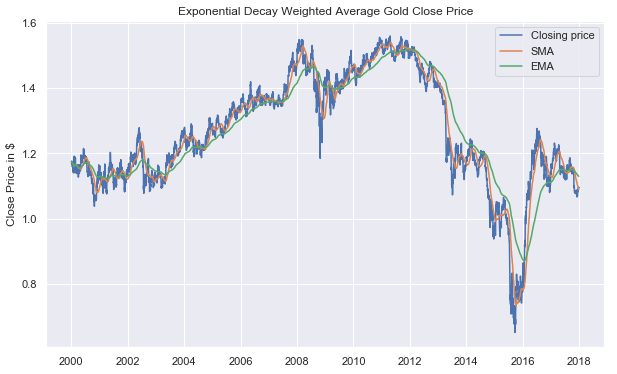

In [70]:
exponentialDecayweightedAverage = X.ewm(span=253, min_periods = 0, adjust = True). mean()
movingAverage = X.rolling(window=50). mean()
plt.plot(X, label= 'Closing price')
plt.plot(movingAverage, label="SMA")
plt.plot(exponentialDecayweightedAverage, label='EMA') 
plt.title('Exponential Decay Weighted Average Gold Close Price')
plt.legend(loc='best')
plt.ylabel('Close Price in $')

Results of Dickey-Fuller Test:
Test Statistic                   -4.758847
p-value                           0.000065
#Lags Used                        9.000000
Number of Observations Used    4518.000000
Critical Value (1%)              -3.431798
Critical Value (5%)              -2.862180
Critical Value (10%)             -2.567111
dtype: float64


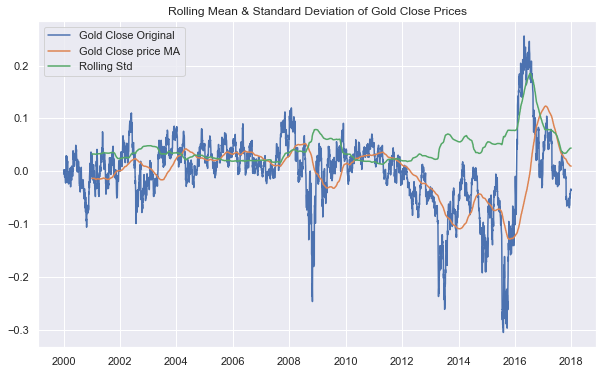

In [71]:
XMinusMovingExponentialDecayAverage = X - exponentialDecayweightedAverage
test_stationarity(XMinusMovingExponentialDecayAverage)
plt.legend(loc='best')

# shifting the data by "1" difference to timeseries

Text(0.5, 1.0, 'Gold close price-Shifted log values to time series')

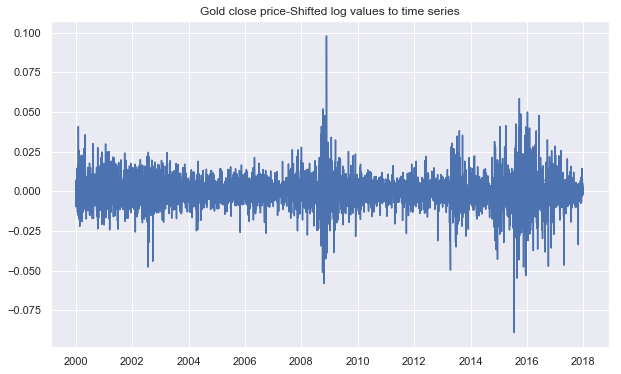

In [132]:
datasetShifting = X - X.shift(1)
plt.plot(datasetShifting)
plt.title("Gold close price-Shifted log values to time series")

Results of Dickey-Fuller Test:
Test Statistic                  -22.572164
p-value                           0.000000
#Lags Used                        8.000000
Number of Observations Used    4518.000000
Critical Value (1%)              -3.431798
Critical Value (5%)              -2.862180
Critical Value (10%)             -2.567111
dtype: float64


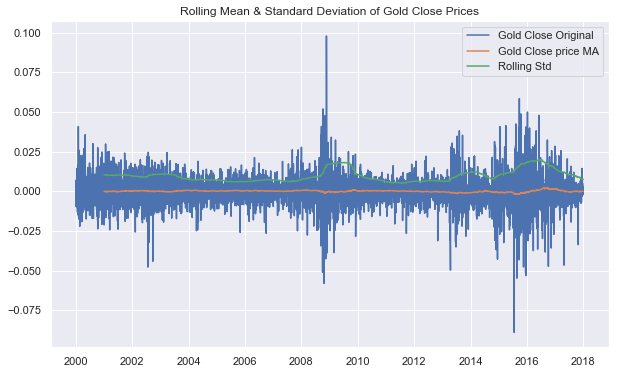

In [73]:
datasetShifting.dropna(inplace=True)
test_stationarity(datasetShifting)
plt.legend(loc='best')

# Decomposing

Results of Dickey-Fuller Test:
Test Statistic                -7.553510e+00
p-value                        3.143269e-11
#Lags Used                     9.000000e+00
Number of Observations Used    4.266000e+03
Critical Value (1%)           -3.431884e+00
Critical Value (5%)           -2.862218e+00
Critical Value (10%)          -2.567131e+00
dtype: float64


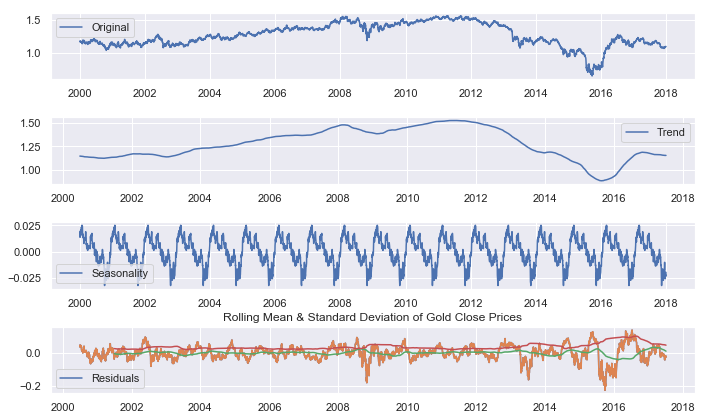

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(X, freq = 253)
trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid

plt.subplot(411) 
plt.plot(X, label = 'Original') 
plt.legend(loc = 'best') 
plt.subplot(412) 
plt.plot(trend, label = 'Trend') 
plt.legend(loc = 'best') 
plt.subplot(413) 
plt.plot(seasonal, label = 'Seasonality') 
plt.legend(loc = 'best') 
plt.subplot(414) 
plt.plot(residual, label = 'Residuals') 
plt.legend(loc = 'best') 
plt.tight_layout()


decomposedData = residual
decomposedData.dropna(inplace=True)
test_stationarity(decomposedData)

# noise check

Results of Dickey-Fuller Test:
Test Statistic                -7.553510e+00
p-value                        3.143269e-11
#Lags Used                     9.000000e+00
Number of Observations Used    4.266000e+03
Critical Value (1%)           -3.431884e+00
Critical Value (5%)           -2.862218e+00
Critical Value (10%)          -2.567131e+00
dtype: float64


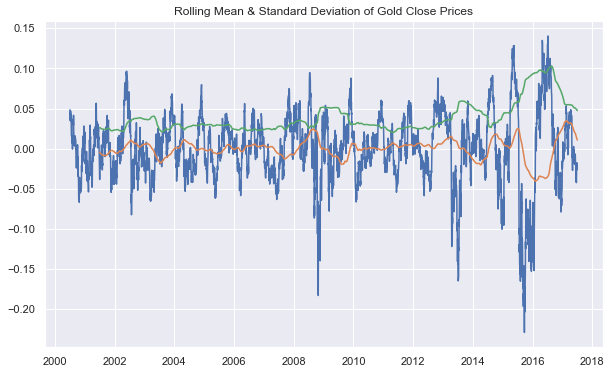

In [76]:
decomposedData = residual
decomposedData.dropna(inplace=True)
test_stationarity(decomposedData)

# ACF, PACF

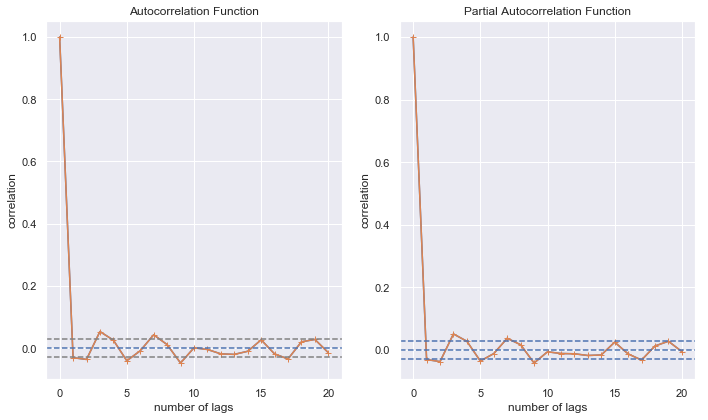

In [77]:
from statsmodels.tsa.stattools import acf, pacf

acf = acf(datasetShifting, nlags = 20)
pacf = pacf(datasetShifting, nlags = 20, method = 'ols')

#plot ACF
plt.subplot(121)
plt.plot(acf)
plt.plot(acf,marker='+')
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(datasetShifting)), linestyle='--', color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(datasetShifting)), linestyle='--', color = 'gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()


#plot PACF
plt.subplot(122)
plt.plot(pacf)
plt.plot(pacf,marker='+')
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(datasetShifting)), linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(datasetShifting)), linestyle='--')
plt.title("Partial Autocorrelation Function")
plt.title('Partial Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

# ARIMA Model

C:\Users\Sarit\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sarit\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 0.4739')

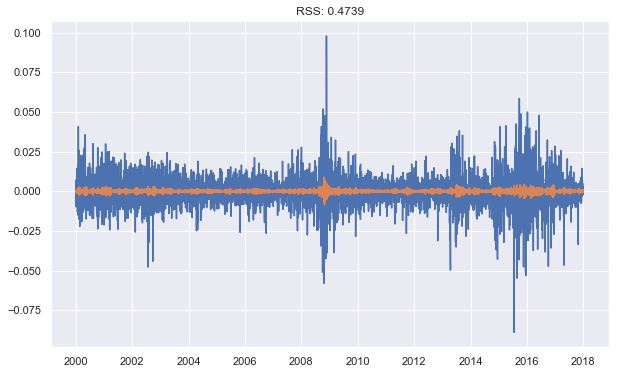

In [78]:
from statsmodels.tsa.arima_model import ARIMA

# AR Model
model = ARIMA(X, order = (2,1,2))
results_AR = model.fit(disp=-1)
plt.plot(datasetShifting)
plt.plot(results_AR.fittedvalues)
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetShifting)**2))

C:\Users\Sarit\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sarit\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 0.4781')

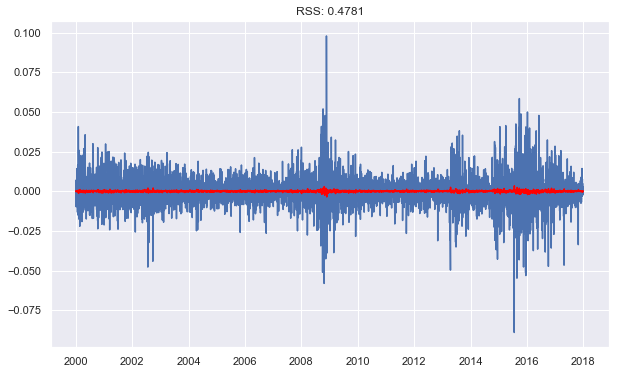

In [80]:
#MA model
model = ARIMA(X, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(datasetShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetShifting)**2))

C:\Users\Sarit\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sarit\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 0.4739')

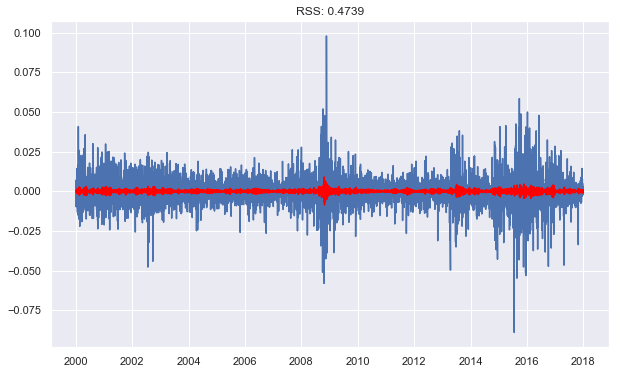

In [81]:
# combined model
model = ARIMA(X, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(datasetShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetShifting)**2))

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4527
Model:                 ARIMA(2, 1, 2)   Log Likelihood               14320.489
Method:                       css-mle   S.D. of innovations              0.010
Date:                Thu, 06 Jun 2019   AIC                         -28628.978
Time:                        01:23:42   BIC                         -28590.472
Sample:                             1   HQIC                        -28615.414
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.779e-05      0.000     -0.120      0.904      -0.000       0.000
ar.L1.D.Close    -0.0290      0.031     -0.931      0.352      -0.090       0.032
ar.L2.D.Close    -0.9002      0.032    -

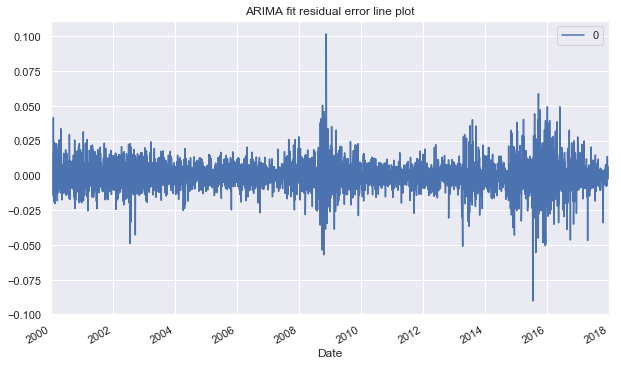

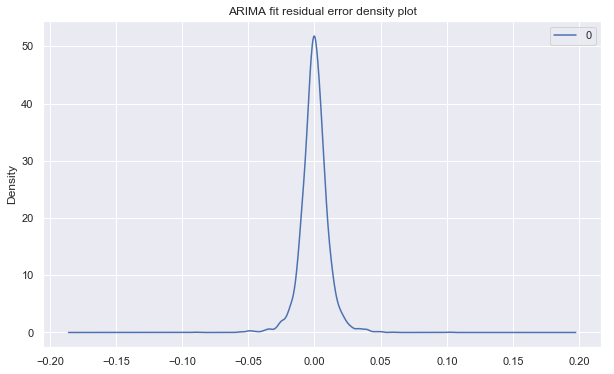

                  0
count  4.527000e+03
mean  -1.480884e-07
std    1.023254e-02
min   -9.006705e-02
25%   -5.162476e-03
50%   -4.317231e-05
75%    5.236018e-03
max    1.016206e-01


In [110]:
from pandas import DataFrame
print(results_ARIMA.summary())
# plot residual errors
residuals = DataFrame(results_ARIMA.resid)
residuals.plot()
plt.title('ARIMA fit residual error line plot')
plt.show()
residuals.plot(kind='kde')
plt.title('ARIMA fit residual error density plot')
plt.show()
print(residuals.describe())

In [85]:
predictions = pd.Series(results_ARIMA.fittedvalues, copy = True)
predictions.head()

Date
2000-01-04   -0.000018
2000-01-05    0.000225
2000-01-06   -0.000208
2000-01-07   -0.000371
2000-01-10    0.000578
dtype: float64

In [86]:
predictions_cumsum = predictions.cumsum()
predictions_cumsum.head()

Date
2000-01-04   -1.778711e-05
2000-01-05    2.070708e-04
2000-01-06   -5.143546e-07
2000-01-07   -3.711339e-04
2000-01-10    2.072681e-04
dtype: float64

In [89]:
#predictions for fitted values
predictions_log = pd.Series(X.ix[0], index= X.index)
predictions_log = predictions_log.add(predictions_cumsum, fill_value=0)
predictions_log.head()

C:\Users\Sarit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Date
2000-01-03    1.175087
2000-01-04    1.175069
2000-01-05    1.175294
2000-01-06    1.175087
2000-01-07    1.174716
dtype: float64

Text(0.5, 1.0, 'RMSE: 0.7980')

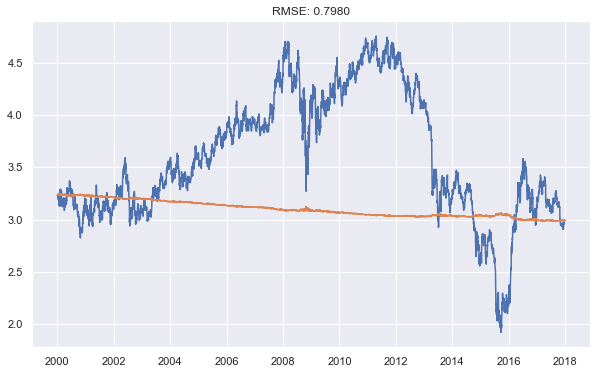

In [91]:
# exponent
predictions = np.exp(predictions_log)
plt.plot(dataset.Close)
plt.plot(predictions)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions-dataset.Close)**2)/len(dataset.Close)))


In [92]:
print(X.describe())

count    4528.000000
mean        1.266313
std         0.172884
min         0.651318
25%         1.149155
50%         1.241132
75%         1.411628
max         1.559800
Name: Close, dtype: float64


C:\Users\Sarit\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Sarit\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Sarit\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


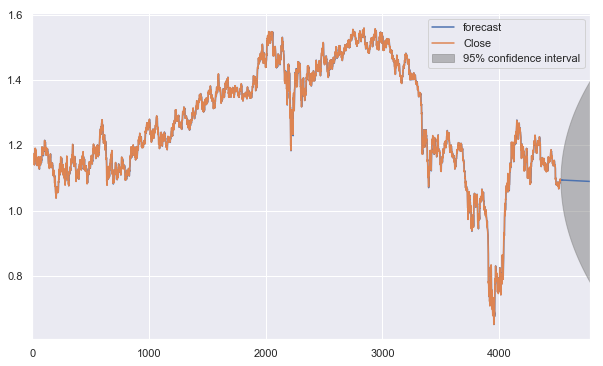

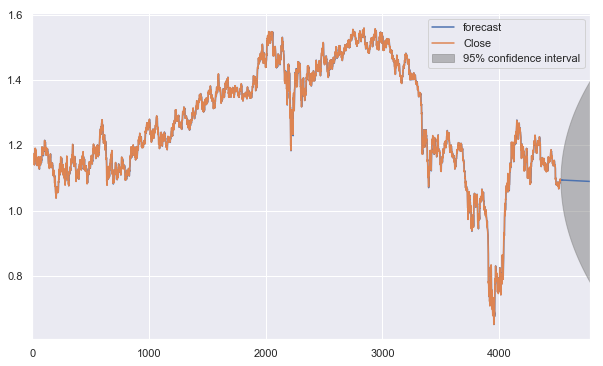

In [94]:
results_ARIMA.plot_predict(1,4781)

In [96]:
# results_ARIMA.plot_predict(1,4781)
results_ARIMA.forecast(steps=253)

(array([1.09448031, 1.09375917, 1.09341732, 1.09404206, 1.09429735,
        1.09369327, 1.09344667, 1.09396327, 1.09413596, 1.09363162,
        1.09345648, 1.09388123, 1.09399225, 1.09357238, 1.0934503 ,
        1.09379748, 1.09386299, 1.09351426, 1.09343109, 1.09371309,
        1.09374547, 1.09345637, 1.09340129, 1.09362881, 1.09363748,
        1.09339811, 1.09336293, 1.09354511, 1.09353718, 1.09333911,
        1.09331767, 1.09346228, 1.09344306, 1.09327914, 1.09326688,
        1.09338047, 1.09335391, 1.09321811, 1.09321164, 1.09329976,
        1.09326871, 1.09315598, 1.09315288, 1.09322013, 1.09318666,
        1.09309278, 1.09309132, 1.09314155, 1.0931071 , 1.09302856,
        1.09302754, 1.09306395, 1.0930295 , 1.09296341, 1.09296202,
        1.09298724, 1.09295344, 1.09289741, 1.09289514, 1.09291133,
        1.09287859, 1.09283065, 1.0928272 , 1.09283614, 1.09280467,
        1.09276322, 1.09275844, 1.09276157, 1.09273148, 1.09269521,
        1.09268904, 1.09268755, 1.09265883, 1.09